In [ ]:
!pip install pmdarima

In [ ]:
# Importing the yfinance package
import yfinance as yf
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd
import numpy as np
import pmdarima as pm
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
# Get today's date
today = date.today()

start_date = '2016-01-01'
end_date = today

In [ ]:
# Set the ticker
ticker = 'GOOGL'

In [ ]:
# Get the data
data = yf.download(ticker, start_date, end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-04,38.110001,38.110001,37.376999,37.972000,37.972000,67382000
2016-01-05,38.205002,38.459999,37.782501,38.076500,38.076500,45216000
2016-01-06,37.518501,38.286499,37.400002,37.966499,37.966499,48206000
2016-01-07,37.324501,37.765499,36.764000,37.049999,37.049999,63132000
2016-01-08,37.389999,37.506001,36.445999,36.545502,36.545502,47506000
...,...,...,...,...,...,...
2024-04-29,169.059998,169.550003,165.210007,166.149994,166.149994,45610000
2024-04-30,165.610001,168.100006,162.600006,162.779999,162.779999,33562900
2024-05-01,164.300003,167.119995,163.089996,163.860001,163.860001,33493200


In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.sample()

,Date,Open,High,Low,Close,Adj Close,Volume
839,2019-05-06,58.599998,59.7715,58.557999,59.673,59.673,31774000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2098 non-null   datetime64[ns]
 1   Open       2098 non-null   float64       
 2   High       2098 non-null   float64       
 3   Low        2098 non-null   float64       
 4   Close      2098 non-null   float64       
 5   Adj Close  2098 non-null   float64       
 6   Volume     2098 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 114.9 KB


In [ ]:
data.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2098,2098.000000,2098.000000,2098.000000,2098.000000,2098.000000,2.098000e+03
mean,2020-03-03 01:49:07.950429184,81.797592,82.679278,80.952335,81.840437,81.840437,3.493673e+07
min,2016-01-04 00:00:00,34.124500,34.166500,33.632999,34.056999,34.056999,9.312000e+06
25%,2018-02-01 06:00:00,52.492501,52.981125,51.779751,52.427250,52.427250,2.489968e+07
50%,2020-03-04 12:00:00,67.672749,68.284500,67.232502,67.663750,67.663750,3.075000e+07
75%,2022-03-31 18:00:00,115.196123,116.720001,113.790874,114.962374,114.962374,3.974600e+07
max,2024-05-03 00:00:00,174.369995,174.710007,169.649994,171.949997,171.949997,1.407980e+08
std,NaN,36.397387,36.827466,35.993067,36.416088,36.416088,1.614266e+07


#Candlestick chart

In [ ]:
#Candlestick chart:- A type of price chart used in technical analysis that displays the low, high and closing prices of a security for a specific period.
figure=go.Figure(data=[go.Candlestick(x=data["Date"],open=data["Open"],high=data["High"],low=data["Low"],close=data["Close"])])
figure.update_layout(title="Google Stock Price Analysis",xaxis_rangeslider_visible=False)
figure.show()

#Closing prices of our whole data in bar plot form

In [ ]:
figure = px.bar(data, x = "Date", y= "Close", color_discrete_sequence=["#2c3e50"])
figure.show()

In [ ]:
#Here we add a rangeslider through which we can visualize the data of a particular period of choice.
figure = px.line(data, x='Date', y='Close', title='Stock Market Analysis with Rangeslider')
figure.update_xaxes(rangeslider_visible=True)
figure.show()

In [ ]:
# The data can be visualized with help of a time period selectors, which help us to get the data of various timeperiods like 1 month, 6 months, 12 months.
figure = px.line(data, x='Date', y='Close',
                 title='Stock Market Analysis with Time Period Selectors')

figure.update_xaxes(
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=3, label="3m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,38.110001,38.110001,37.376999,37.972000,37.972000,67382000
1,2016-01-05,38.205002,38.459999,37.782501,38.076500,38.076500,45216000
2,2016-01-06,37.518501,38.286499,37.400002,37.966499,37.966499,48206000
3,2016-01-07,37.324501,37.765499,36.764000,37.049999,37.049999,63132000
4,2016-01-08,37.389999,37.506001,36.445999,36.545502,36.545502,47506000
...,...,...,...,...,...,...,...
2093,2024-04-29,169.059998,169.550003,165.210007,166.149994,166.149994,45610000
2094,2024-04-30,165.610001,168.100006,162.600006,162.779999,162.779999,33562900
2095,2024-05-01,164.300003,167.119995,163.089996,163.860001,163.860001,33493200
2096,2024-05-02,164.789993,166.729996,163.889999,166.619995,166.619995,24294500


In [ ]:
# train / test split
train = data.query('Date <  "2023-01-01"')
test = data.query('Date >= "2023-01-01"')

In [ ]:
train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,38.110001,38.110001,37.376999,37.972000,37.972000,67382000
1,2016-01-05,38.205002,38.459999,37.782501,38.076500,38.076500,45216000
2,2016-01-06,37.518501,38.286499,37.400002,37.966499,37.966499,48206000
3,2016-01-07,37.324501,37.765499,36.764000,37.049999,37.049999,63132000
4,2016-01-08,37.389999,37.506001,36.445999,36.545502,36.545502,47506000
...,...,...,...,...,...,...,...
1757,2022-12-23,87.110001,89.550003,87.070000,89.230003,89.230003,23003000
1758,2022-12-27,88.800003,88.940002,87.010002,87.389999,87.389999,20097300
1759,2022-12-28,86.980003,88.040001,85.940002,86.019997,86.019997,19523200
1760,2022-12-29,86.620003,88.849998,86.610001,88.449997,88.449997,23333500


In [ ]:
test

,Date,Open,High,Low,Close,Adj Close,Volume
1762,2023-01-03,89.589996,91.050003,88.519997,89.120003,89.120003,28131200
1763,2023-01-04,90.349998,90.650002,87.269997,88.080002,88.080002,34854800
1764,2023-01-05,87.470001,87.570000,85.900002,86.199997,86.199997,27194400
1765,2023-01-06,86.790001,87.690002,84.860001,87.339996,87.339996,41381500
1766,2023-01-09,88.360001,90.050003,87.860001,88.019997,88.019997,29003900
...,...,...,...,...,...,...,...
2093,2024-04-29,169.059998,169.550003,165.210007,166.149994,166.149994,45610000
2094,2024-04-30,165.610001,168.100006,162.600006,162.779999,162.779999,33562900
2095,2024-05-01,164.300003,167.119995,163.089996,163.860001,163.860001,33493200
2096,2024-05-02,164.789993,166.729996,163.889999,166.619995,166.619995,24294500


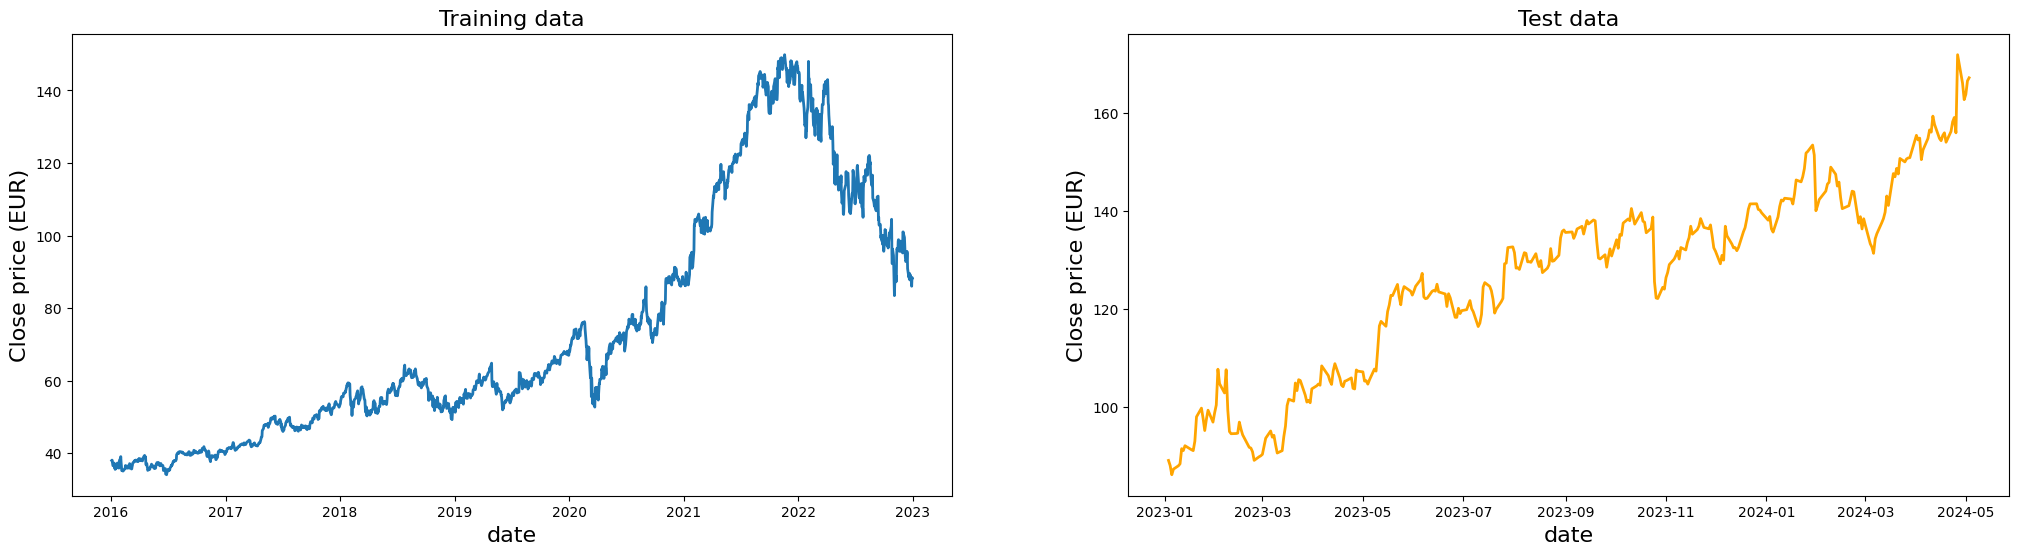

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 6))
ax1.plot(train.Date, train['Close'], lw=2)
ax1.set_xlabel("date", fontsize=16)
ax1.set_ylabel("Close price (EUR)", fontsize=16)
ax1.set_title("Training data", fontsize=16)
ax2.plot(test.Date, test['Close'], c='orange', lw=2)
ax2.set_xlabel("date", fontsize=16)
ax2.set_ylabel("Close price (EUR)", fontsize=16)
ax2.set_title("Test data", fontsize=16);

#Check for stationarity of time series

**ACF plot and PACF plot**

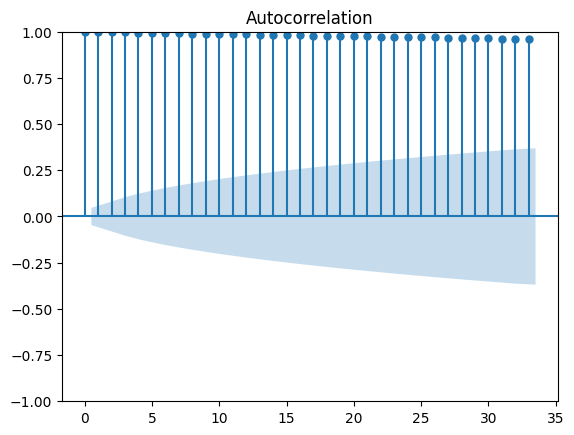

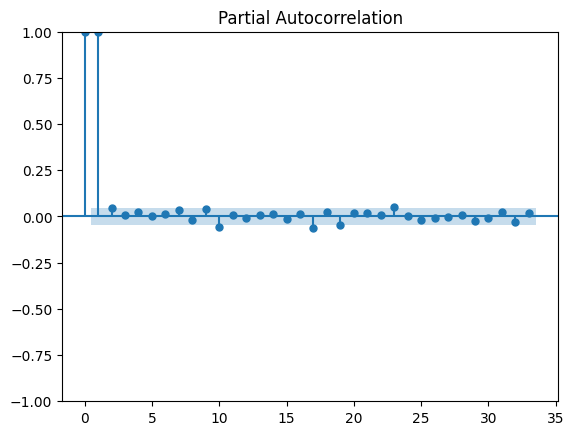

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

acf_original = plot_acf(train['Close'])

pacf_original = plot_pacf(train['Close'])

**Augmented Dickey Fuller test**

In [ ]:
from statsmodels.tsa.stattools import adfuller

#Test for stationarity
def test_stationarity(timeseries):
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
      output['critical value (%s)'%key] =  values
    print(output)
test_stationarity(train['Close'])

Results of dickey fuller test
Test Statistics                  -1.103922
p-value                           0.713505
No. of lags used                 22.000000
Number of observations used    1739.000000
critical value (1%)              -3.434116
critical value (5%)              -2.863203
critical value (10%)             -2.567656
dtype: float64


**ADF test**

In [ ]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(train['Close'])
print(f'p-value: {adf_test[1]}')

p-value: 0.7135054249478376


#Transform to stationary: differencing

<Axes: >

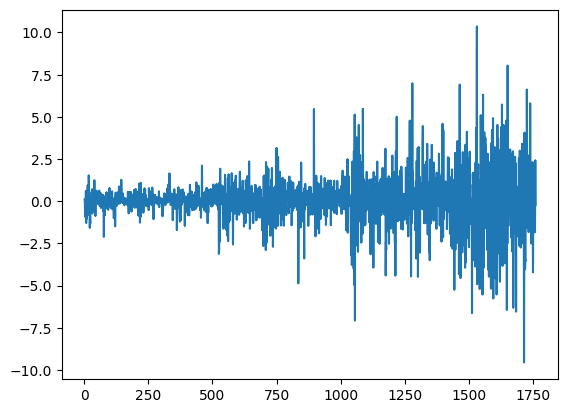

In [ ]:
# Assuming train is your NumPy array
train_series = pd.Series(train['Close'])
# If the p-value is greater than 0.05, apply differencing to make the data stationary

df_train_diff = train_series.diff().dropna()
df_train_diff.plot()

In [ ]:
df_train_diff

1       0.104500
2      -0.110001
3      -0.916500
4      -0.504498
5       0.107998
          ...   
1757    1.470001
1758   -1.840004
1759   -1.370003
1760    2.430000
1761   -0.219994
Name: Close, Length: 1761, dtype: float64

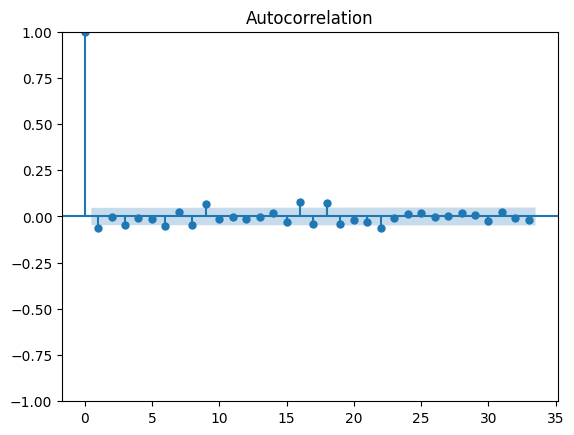

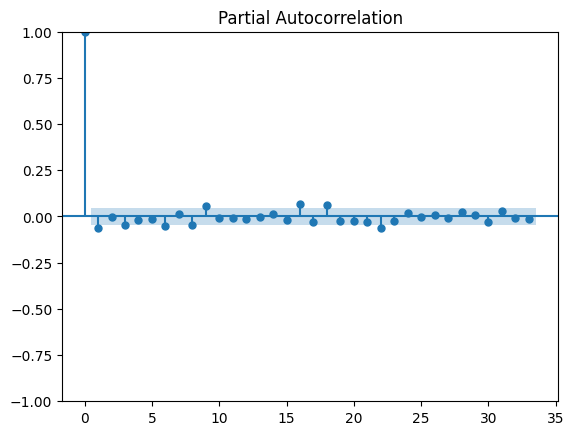

In [ ]:
acf_diff = plot_acf(df_train_diff)

pacf_diff = plot_pacf(df_train_diff)

In [ ]:
adf_test = adfuller(df_train_diff)
print(f'p-value: {adf_test[1]}')

p-value: 1.441358872189978e-16


In [ ]:
train=df_train_diff

In [ ]:
train

1       0.104500
2      -0.110001
3      -0.916500
4      -0.504498
5       0.107998
          ...   
1757    1.470001
1758   -1.840004
1759   -1.370003
1760    2.430000
1761   -0.219994
Name: Close, Length: 1761, dtype: float64

In [ ]:
test=test['Close']
test

1762     89.120003
1763     88.080002
1764     86.199997
1765     87.339996
1766     88.019997
           ...    
2093    166.149994
2094    162.779999
2095    163.860001
2096    166.619995
2097    167.240005
Name: Close, Length: 336, dtype: float64

In [ ]:
import itertools
import warnings
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Suppress ARIMA convergence warnings
warnings.filterwarnings("ignore")

# Function to evaluate ARIMA model
def evaluate_arima_model(train, arima_order):
    p, d, q = arima_order
    # Fit ARIMA model
    model = ARIMA(train, order=(p,d,q))
    model_fit = model.fit()
    # Calculate AIC and BIC
    aic = model_fit.aic
    bic = model_fit.bic
    return aic, bic

# Function to grid search ARIMA parameters
def grid_search_arima(train, p_values, d_values, q_values):
    best_aic, best_bic, best_cfg = float("inf"), float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    aic, bic = evaluate_arima_model(train, order)
                    if aic < best_aic:
                        best_aic, best_bic, best_cfg = aic, bic, order
                    print('ARIMA%s AIC=%.2f BIC=%.2f' % (order, aic, bic))
                except:
                    continue
    print('Best ARIMA%s AIC=%.2f BIC=%.2f' % (best_cfg, best_aic, best_bic))
    return best_cfg

# Define range of p, d, q values
p_values = range(0, 5)
d_values = range(0, 1)
q_values = range(0, 5)

# Grid search ARIMA parameters
best_cfg = grid_search_arima(train, p_values, d_values, q_values)

# Print the best combination of p, d, and q values
print("Best combination of p, d, q:", best_cfg)

ARIMA(0, 0, 0) AIC=6437.98 BIC=6448.92
ARIMA(0, 0, 1) AIC=6432.76 BIC=6449.18
ARIMA(0, 0, 2) AIC=6434.69 BIC=6456.59
ARIMA(0, 0, 3) AIC=6432.39 BIC=6459.76
ARIMA(0, 0, 4) AIC=6434.10 BIC=6466.94
ARIMA(1, 0, 0) AIC=6432.84 BIC=6449.26
ARIMA(1, 0, 1) AIC=6431.45 BIC=6453.35
ARIMA(1, 0, 2) AIC=6432.73 BIC=6460.10
ARIMA(1, 0, 3) AIC=6432.78 BIC=6465.62
ARIMA(1, 0, 4) AIC=6434.13 BIC=6472.45
ARIMA(2, 0, 0) AIC=6434.81 BIC=6456.70
ARIMA(2, 0, 1) AIC=6432.66 BIC=6460.03
ARIMA(2, 0, 2) AIC=6433.49 BIC=6466.34
ARIMA(2, 0, 3) AIC=6436.73 BIC=6475.04
ARIMA(2, 0, 4) AIC=6435.94 BIC=6479.72
ARIMA(3, 0, 0) AIC=6433.15 BIC=6460.52
ARIMA(3, 0, 1) AIC=6432.66 BIC=6465.50
ARIMA(3, 0, 2) AIC=6434.55 BIC=6472.87
ARIMA(3, 0, 3) AIC=6427.71 BIC=6471.50
ARIMA(3, 0, 4) AIC=6422.55 BIC=6471.81
ARIMA(4, 0, 0) AIC=6434.66 BIC=6467.50
ARIMA(4, 0, 1) AIC=6434.59 BIC=6472.91
ARIMA(4, 0, 2) AIC=6435.38 BIC=6479.16
ARIMA(4, 0, 3) AIC=6422.55 BIC=6471.81
ARIMA(4, 0, 4) AIC=6426.30 BIC=6481.04
Best ARIMA(3, 0, 4) AIC=6

In [ ]:
p=3
d=0
q=4

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(p,d,q))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1761
Model:                 ARIMA(3, 0, 4)   Log Likelihood               -3202.273
Date:                Sat, 04 May 2024   AIC                           6422.546
Time:                        16:58:19   BIC                           6471.809
Sample:                             0   HQIC                          6440.751
                               - 1761                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0287      0.031      0.935      0.350      -0.031       0.089
ar.L1         -1.0763      0.124     -8.663      0.000      -1.320      -0.833
ar.L2          0.3557      0.221      1.607      0.1

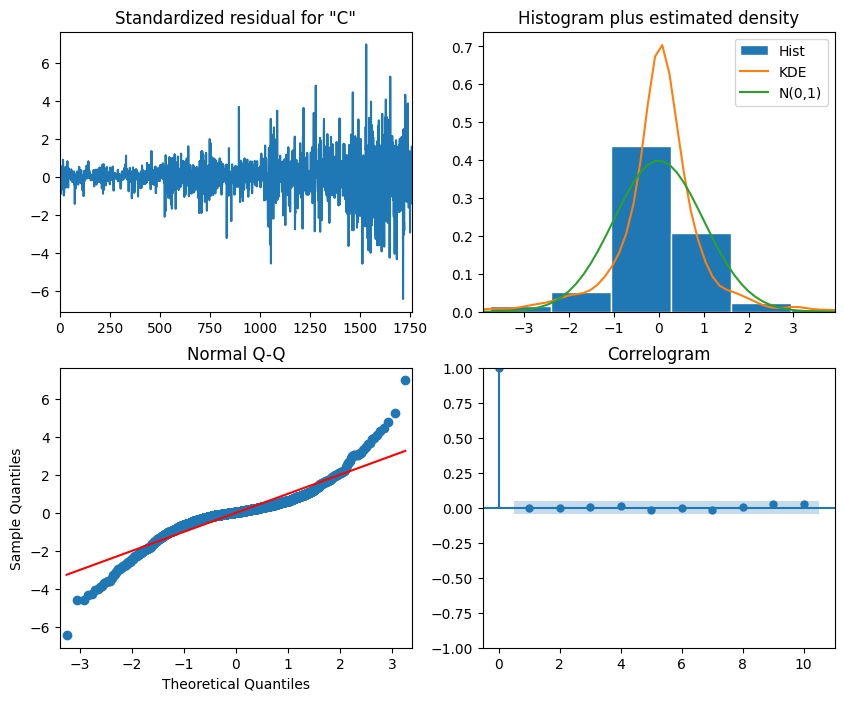

In [ ]:
# Plot model diagnostics
model_fit.plot_diagnostics(figsize=(10, 8))
plt.show()

In [ ]:
# Predict future values
forecast_steps = 3
forecast = model_fit.forecast(steps=forecast_steps)

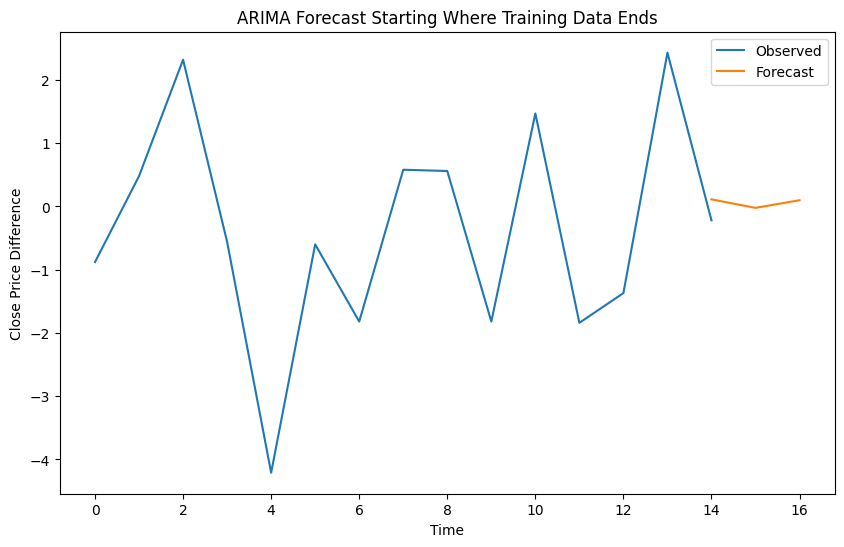

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming train is a numpy array or pandas Series
train_last_15 = train[-15:] if isinstance(train, np.ndarray) else train.iloc[-15:]

# Adjust the forecast indices to start where the training data ends
forecast_start_index = len(train_last_15)-1
forecast_end_index = forecast_start_index + len(forecast)

# Plot the forecast starting where the training data ends
plt.figure(figsize=(10, 6))
plt.plot(np.arange(len(train_last_15)), train_last_15, label='Observed')
plt.plot(np.arange(forecast_start_index, forecast_end_index), forecast, label='Forecast')
plt.xlabel('Time')
plt.ylabel('Close Price Difference')
plt.title('ARIMA Forecast Starting Where Training Data Ends')
plt.legend()
plt.show()


#LSTM

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,38.110001,38.110001,37.376999,37.972000,37.972000,67382000
1,2016-01-05,38.205002,38.459999,37.782501,38.076500,38.076500,45216000
2,2016-01-06,37.518501,38.286499,37.400002,37.966499,37.966499,48206000
3,2016-01-07,37.324501,37.765499,36.764000,37.049999,37.049999,63132000
4,2016-01-08,37.389999,37.506001,36.445999,36.545502,36.545502,47506000
...,...,...,...,...,...,...,...
2093,2024-04-29,169.059998,169.550003,165.210007,166.149994,166.149994,45610000
2094,2024-04-30,165.610001,168.100006,162.600006,162.779999,162.779999,33562900
2095,2024-05-01,164.300003,167.119995,163.089996,163.860001,163.860001,33493200
2096,2024-05-02,164.789993,166.729996,163.889999,166.619995,166.619995,24294500


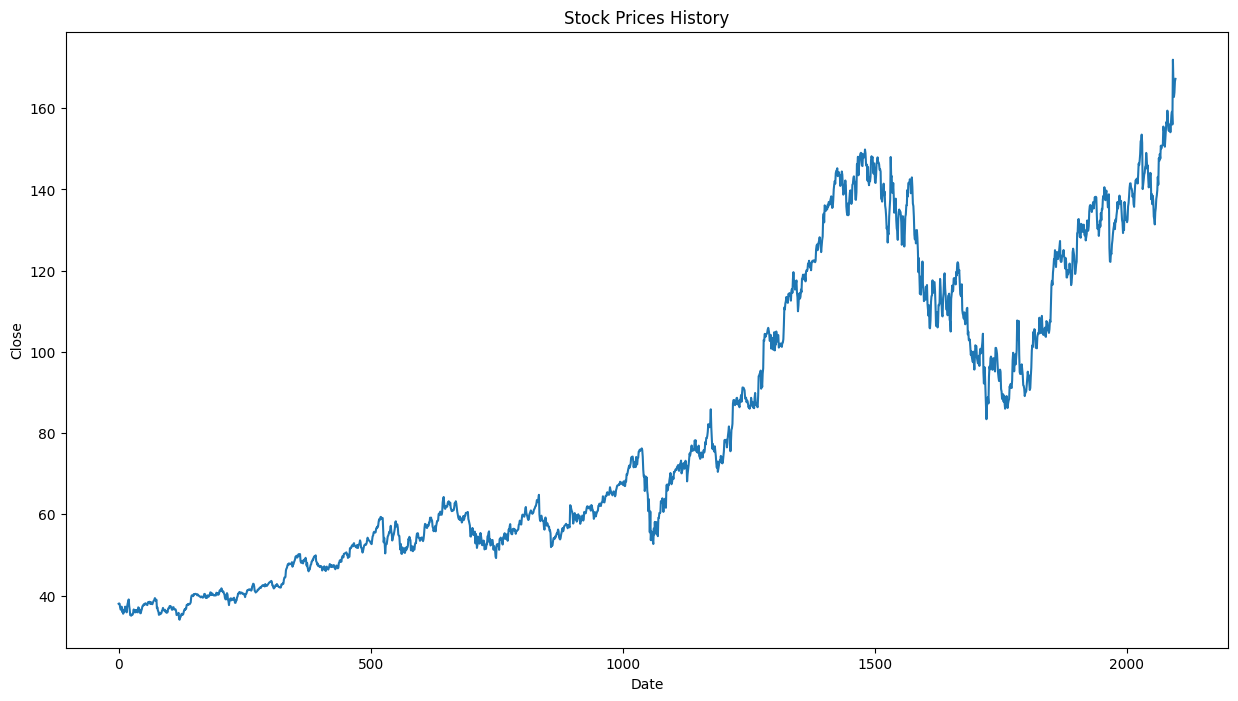

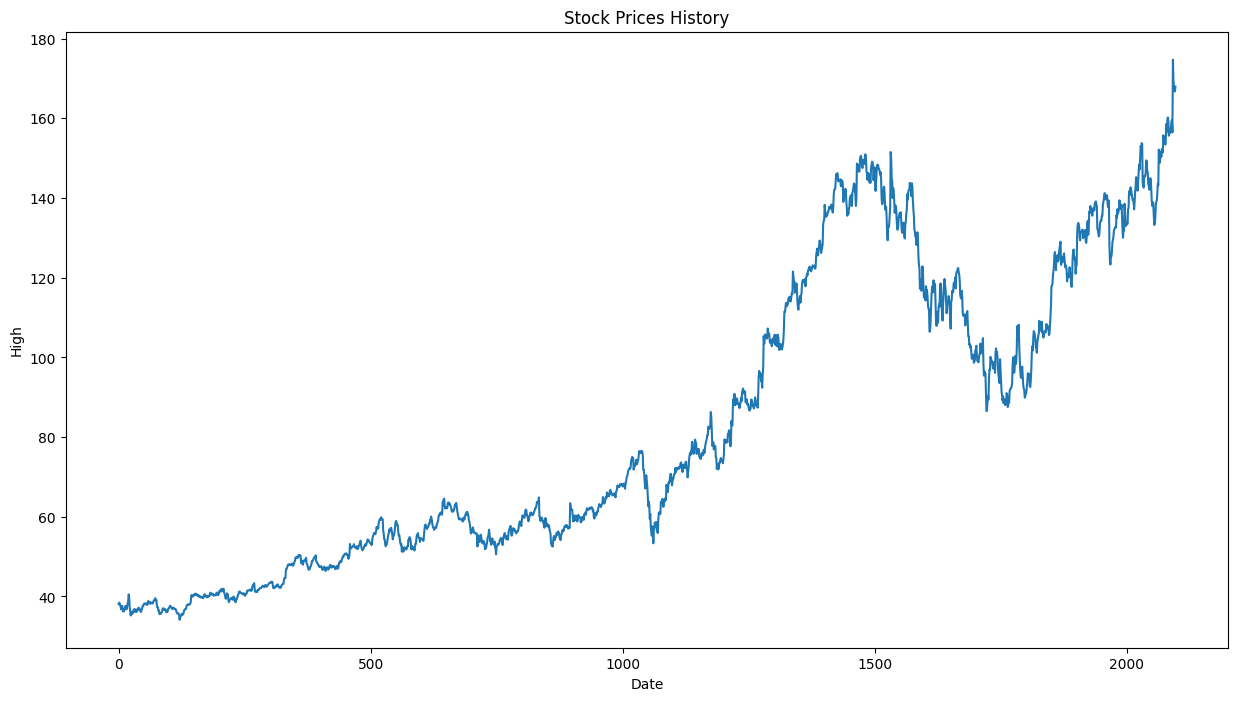

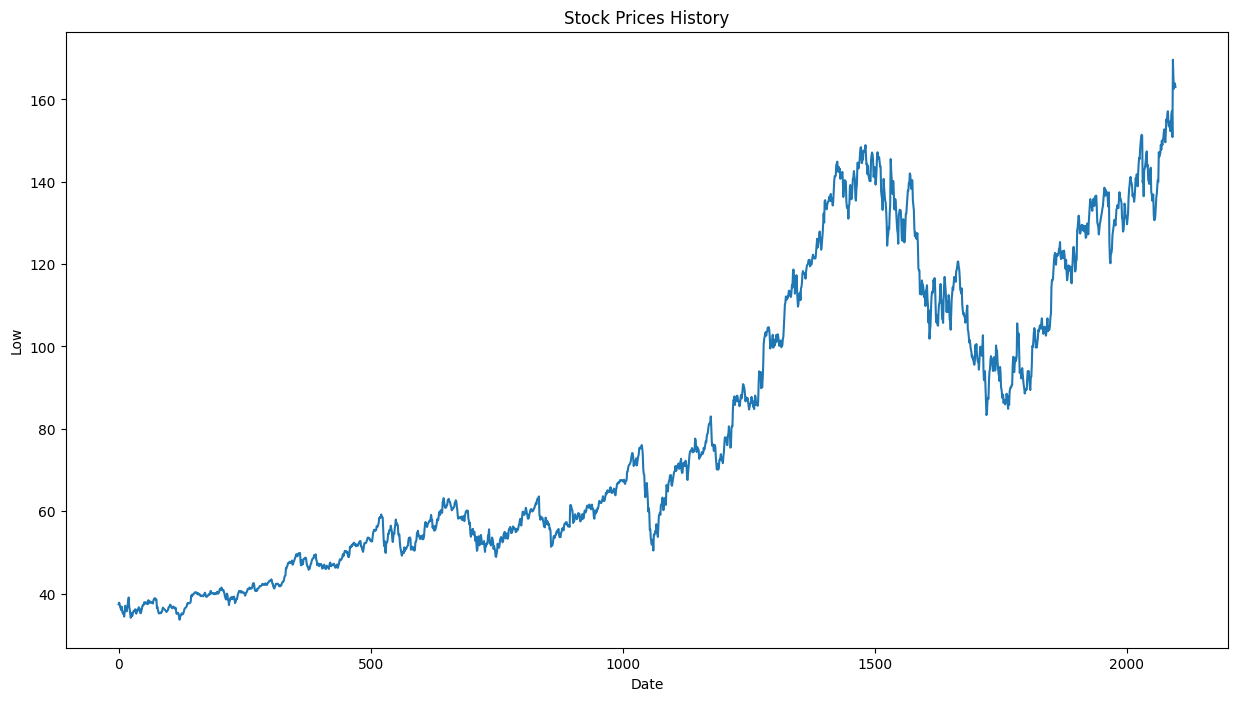

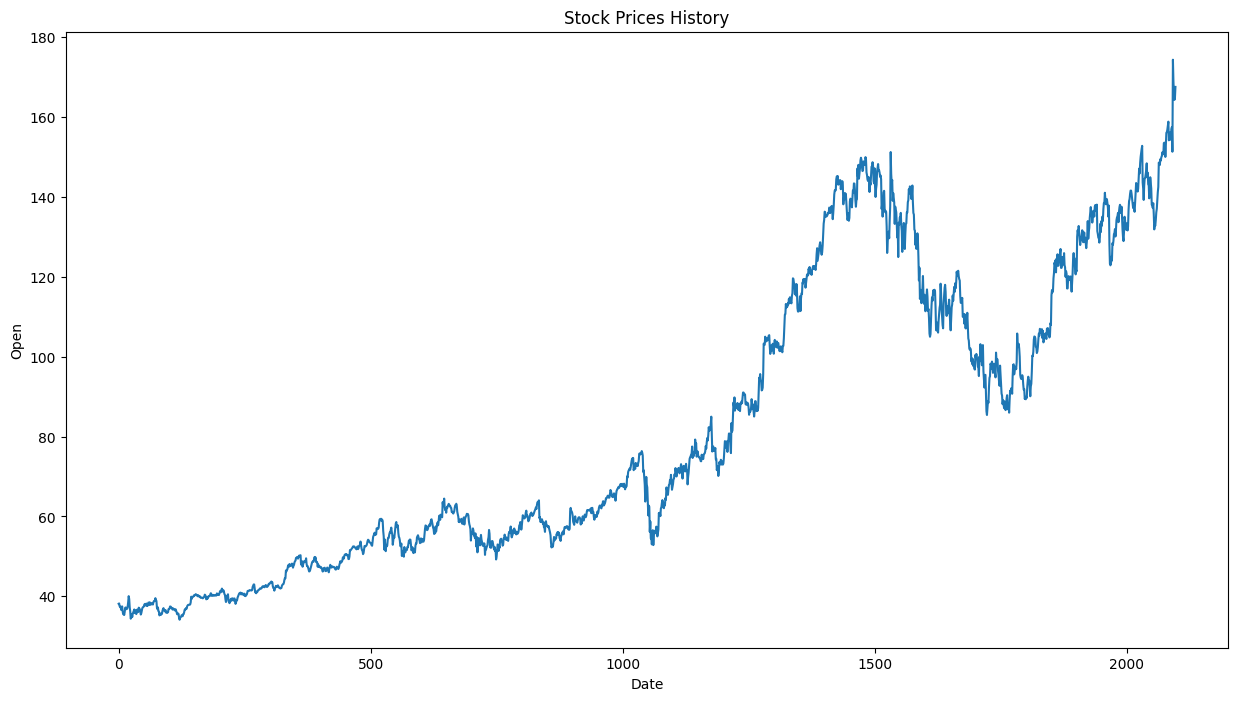

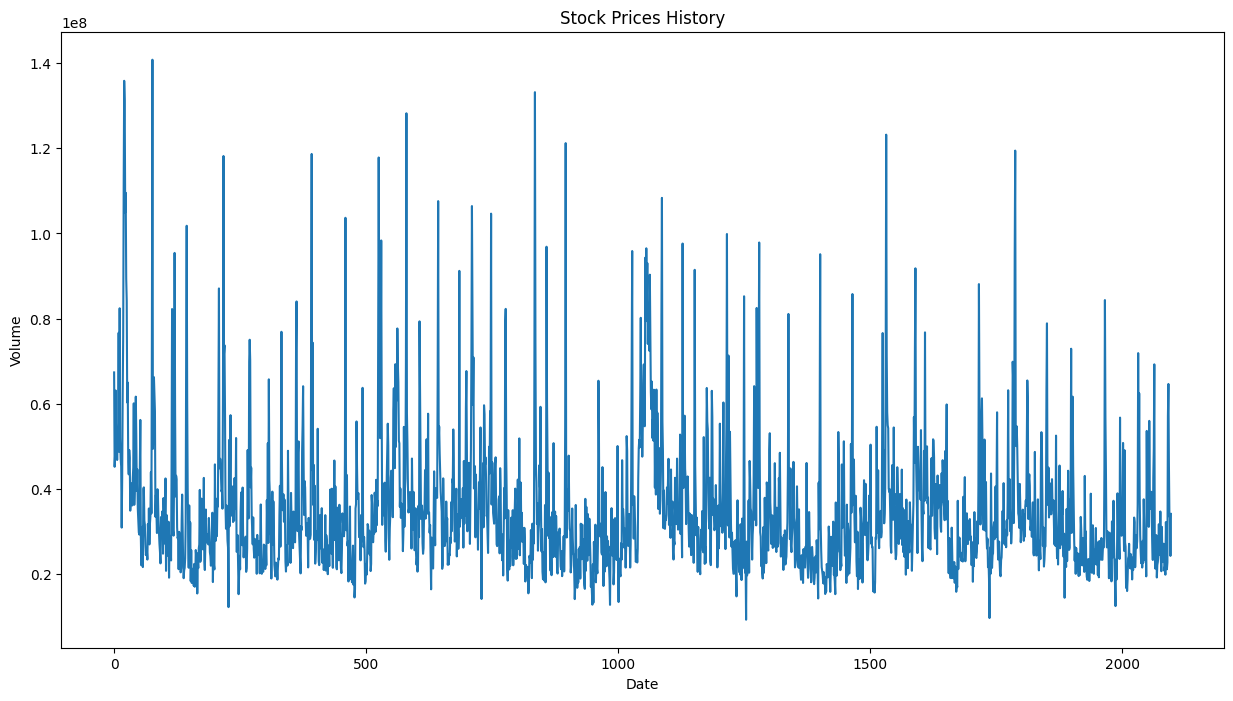

In [ ]:
feauters = ['Close','High','Low','Open','Volume']

i = 0
while i<5:
    plt.figure(figsize=(15, 8))
    plt.title('Stock Prices History')
    plt.plot(data[feauters[i]])
    plt.xlabel('Date')
    plt.ylabel(feauters[i])
    i += 1

In [ ]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-01-04,38.110001,38.110001,37.376999,37.972000,37.972000,67382000
1,2016-01-05,38.205002,38.459999,37.782501,38.076500,38.076500,45216000
2,2016-01-06,37.518501,38.286499,37.400002,37.966499,37.966499,48206000
3,2016-01-07,37.324501,37.765499,36.764000,37.049999,37.049999,63132000
4,2016-01-08,37.389999,37.506001,36.445999,36.545502,36.545502,47506000
...,...,...,...,...,...,...,...
2093,2024-04-29,169.059998,169.550003,165.210007,166.149994,166.149994,45610000
2094,2024-04-30,165.610001,168.100006,162.600006,162.779999,162.779999,33562900
2095,2024-05-01,164.300003,167.119995,163.089996,163.860001,163.860001,33493200
2096,2024-05-02,164.789993,166.729996,163.889999,166.619995,166.619995,24294500


#Base Model 1

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_14 (LSTM)              (None, 5, 50)             10600     
                                                                 
 lstm_15 (LSTM)              (None, 50)                20200     
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30851 (120.51 KB)
Trainable params: 30851 (120.51 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
48/48 [==============================] - 6s 30ms/step - loss: 0.0151 - val_loss: 0.0025
Epoch 2/100
48/48 [==============================] - 1s 11ms/step - loss: 3.7181e-04 - val_loss: 0.0015
Epoch 3/100
48/48 [==============================] - 1s 11ms/step - loss: 2.

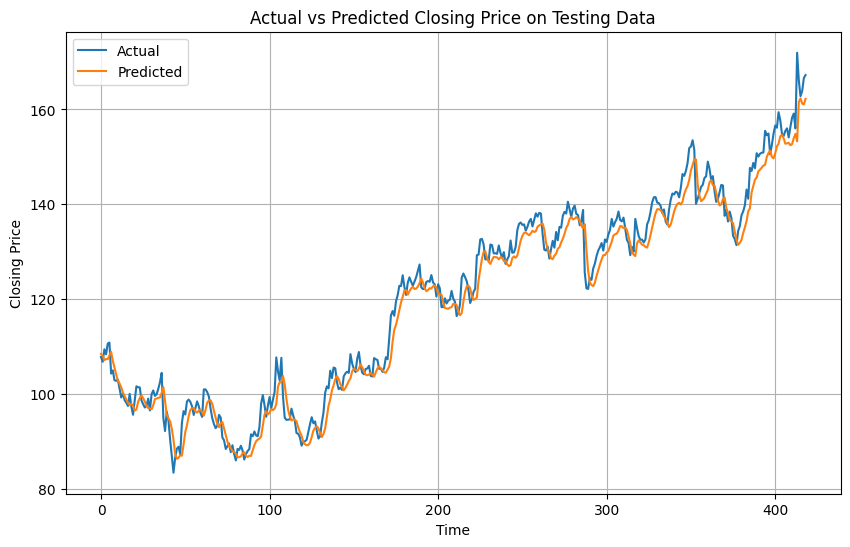

Root Mean Squared Error (RMSE): 3.41


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout
import matplotlib.pyplot as plt

# Create a DataFrame with your provided data

# Select relevant features and normalize the data
selected_features = ['Open', 'Close']
scaled_data = MinMaxScaler().fit_transform(data[selected_features])

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, -1])
    return np.array(X), np.array(y)

# Set sequence length and split data into train and test sets
seq_length = 5  # You can adjust this based on your preference
X, y = create_sequences(scaled_data, seq_length)
X_train, X_test = X[:int(len(X)*0.8)], X[int(len(X)*0.8):]
y_train, y_test = y[:int(len(y)*0.8)], y[int(len(y)*0.8):]

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.1)

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions to original scale
scaler = MinMaxScaler()
scaler.fit(data['Close'].values.reshape(-1, 1))
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Price on Testing Data')
plt.legend()
plt.grid()
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, test_predictions))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


#Base Model 2

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 3, 50)             10400     
                                                                 
 lstm_17 (LSTM)              (None, 50)                20200     
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
48/48 [==============================] - 5s 28ms/step - loss: 0.0293 - val_loss: 0.0047
Epoch 2/100
48/48 [==============================] - 0s 9ms/step - loss: 6.9451e-04 - val_loss: 0.0012
Epoch 3/100
48/48 [==============================] - 0s 7ms/step - loss: 3.60

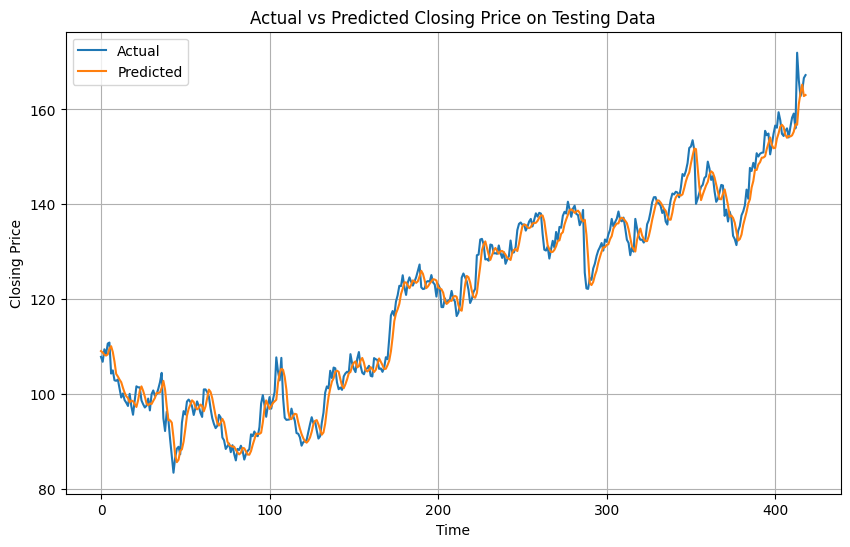

Root Mean Squared Error (RMSE): 3.02


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Create a DataFrame with your provided data

# Select relevant features and normalize the data
selected_features = ['Close']
scaled_data = MinMaxScaler().fit_transform(data[selected_features])

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, -1])
    return np.array(X), np.array(y)

# Set sequence length and split data into train and test sets
seq_length = 3  # You can adjust this based on your preference
X, y = create_sequences(scaled_data, seq_length)
X_train, X_test = X[:int(len(X)*0.8)], X[int(len(X)*0.8):]
y_train, y_test = y[:int(len(y)*0.8)], y[int(len(y)*0.8):]

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.1)

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions to original scale
scaler = MinMaxScaler()
scaler.fit(data['Close'].values.reshape(-1, 1))
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Price on Testing Data')
plt.legend()
plt.grid()
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, test_predictions))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


#Improved Model

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 5, 100)            42400     
                                                                 
 lstm_21 (LSTM)              (None, 100)               80400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_10 (Dense)            (None, 1)                 101       
                                                                 
Total params: 122901 (480.08 KB)
Trainable params: 122901 (480.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
48/48 [==============================] - 6s 34ms/step - loss: 0.0093 - val_loss: 0.0020
Epoch 2/100
48/48 [==========================

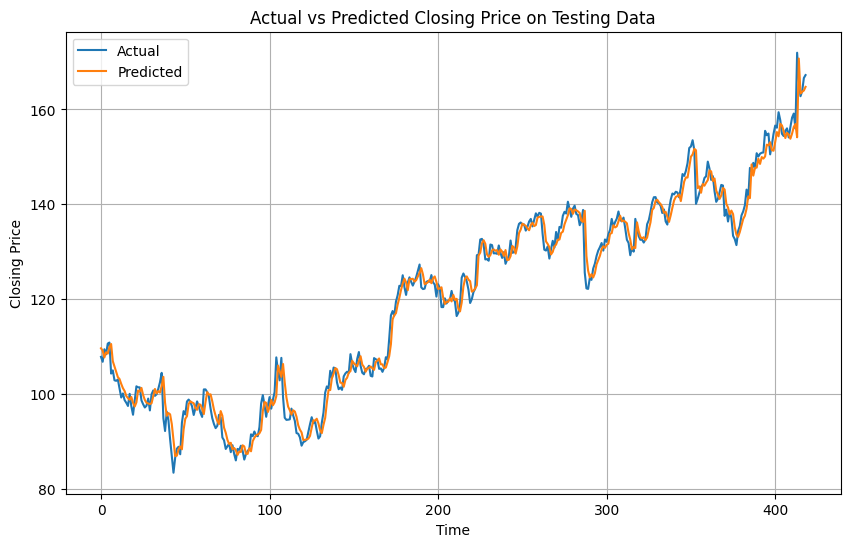

Root Mean Squared Error (RMSE): 2.66


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM, Dense,Dropout
import matplotlib.pyplot as plt

# Create a DataFrame with your provided data

# Select relevant features and normalize the data
selected_features = ['Open', 'High', 'Low', 'Volume', 'Close']
scaled_data = MinMaxScaler().fit_transform(data[selected_features])

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length, -1])
    return np.array(X), np.array(y)

# Set sequence length and split data into train and test sets
seq_length = 5  # You can adjust this based on your preference
X, y = create_sequences(scaled_data, seq_length)
X_train, X_test = X[:int(len(X)*0.8)], X[int(len(X)*0.8):]
y_train, y_test = y[:int(len(y)*0.8)], y[int(len(y)*0.8):]

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.05))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()
# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1, validation_split=0.1)

# Predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions to original scale
scaler = MinMaxScaler()
scaler.fit(data['Close'].values.reshape(-1, 1))
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(test_predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Price on Testing Data')
plt.legend()
plt.grid()
plt.show()

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, test_predictions))
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


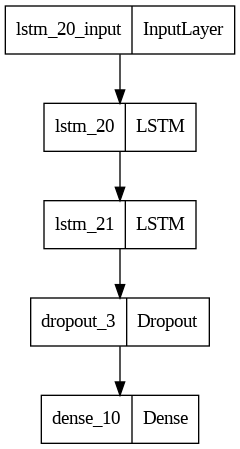

In [ ]:
#PLot the whole MODEL 3.
from keras.utils import plot_model
plot_model(model)

In [ ]:
# Get the last sequence from the test data
last_sequence = X_test[-1]

# Reshape the last sequence to match the input shape of the model
last_sequence = last_sequence.reshape((1, seq_length, len(selected_features)))

# Predict the next 5 days
next_5_days_predictions = []
for _ in range(5):
    next_day_prediction = model.predict(last_sequence)[0]
    next_5_days_predictions.append(next_day_prediction)
    # Update the sequence to include the predicted value and remove the oldest value
    last_sequence = np.roll(last_sequence, -1, axis=1)
    last_sequence[0, -1] = next_day_prediction

# Inverse transform predictions to original scale
next_5_days_predictions = np.array(next_5_days_predictions)
next_5_days_predictions = scaler.inverse_transform(next_5_days_predictions)

# Print the predictions
print("Predicted Closing Prices for the Next 5 Days:")
for i, price in enumerate(next_5_days_predictions.flatten(), start=1):
    print(f"Day {i}: ${price:.2f}")


1/1 [==============================] - 0s 24ms/step
Predicted Closing Prices for the Next 5 Days:
Day 1: $164.76
Day 2: $166.40
Day 3: $167.85
Day 4: $169.92
Day 5: $172.27


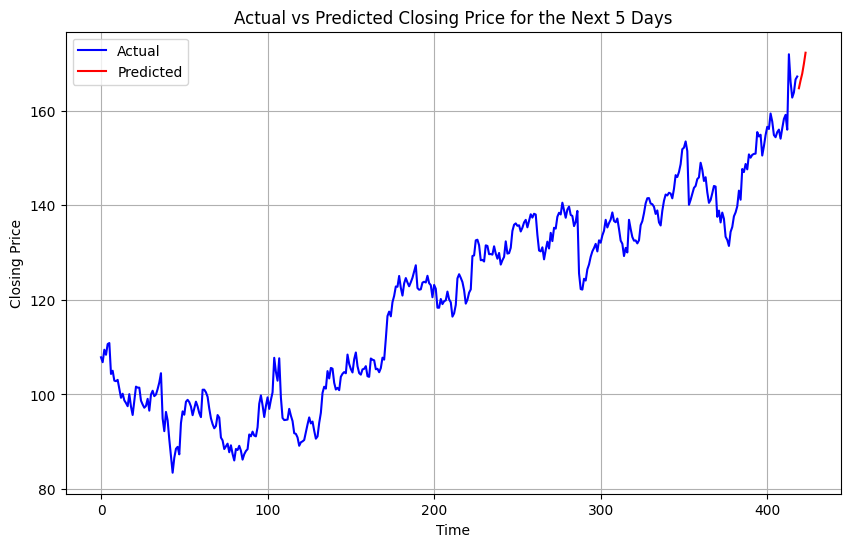

In [ ]:
# Plotting
plt.figure(figsize=(10, 6))

# Plotting actual closing prices for the test data
plt.plot(y_test_inv[:, -1], label='Actual', color='blue')

# Plotting predicted closing prices for the next 5 days
plt.plot(range(len(y_test_inv), len(y_test_inv) + 5), next_5_days_predictions[:, -1], label='Predicted', color='red')

plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.title('Actual vs Predicted Closing Price for the Next 5 Days')
plt.legend()
plt.grid()
plt.show()
